In [2]:
import pandas as pd

anime = pd.read_csv('dataanime-norm.csv')
anime.head(5)

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,Kimi no Na wa.,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,Gintama°,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Steins;Gate 0,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,Steins;Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


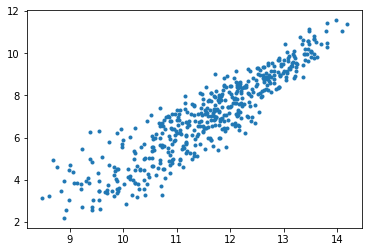

In [8]:
import matplotlib.pyplot as plt
import numpy as np
animedata = np.log(anime[['Members','Favorites']].head(500))
plt.plot(animedata['Members'],animedata['Favorites'],'.')

In [28]:
#K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

klaster = 3

kmeans = KMeans(n_clusters=klaster, init='k-means++')
kmeans.fit(animedata.values)

labels = pairwise_distances_argmin(animedata.values, kmeans.cluster_centers_)

print animedata.head(5)
print labels[0:5]

     Members  Favorites
0  13.977942  11.565395
1  13.466217  10.432232
2  12.177462   8.629986
3  12.135280   7.018402
4  13.805883  11.411612
[0 0 0 2 0]


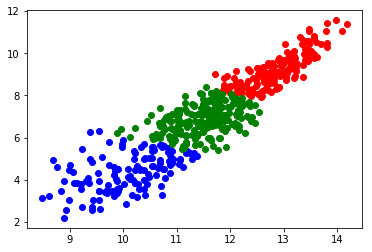

In [38]:
colors = ['red','blue','green']

for k, col in zip(range(klaster),colors):
    members = (labels == k)
    
    plt.plot(animedata.values[members,0], animedata.values[members,1],'o',markerfacecolor=col,marker='o',markeredgecolor=col)
    

set([0, 1, 2, -1])


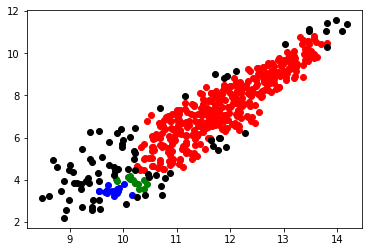

In [45]:
# DBScan

from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.3, min_samples=10)
dbs.fit(animedata.values)

labels = set(dbs.labels_)
print labels

colors = ['red','blue','green','k']

for k, col in zip(labels,colors):
    if k == -1:
        col = 'k'
    
    members = (dbs.labels_ == k)
    plt.plot(animedata.values[members,0], animedata.values[members,1],'o',markerfacecolor=col,marker='o',markeredgecolor=col)